In [1]:
import os
import tensorflow as tf

In [2]:
log_dir = os.path.join(os.path.realpath('..'), 'logs/20200428213740')
assert os.path.isdir(log_dir), 'No log directory found'

In [3]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

Reusing TensorBoard on port 6006 (pid 19979), started 0:11:34 ago. (Use '!kill 19979' to kill it.)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from image_to_image.trainer import Trainer

In [15]:
dataset_dir = '../../facades'
trainer = Trainer(dataset_dir, log_dir)

[400, 100]


In [19]:
trainer._checkpoint.restore(tf.train.latest_checkpoint(log_dir))

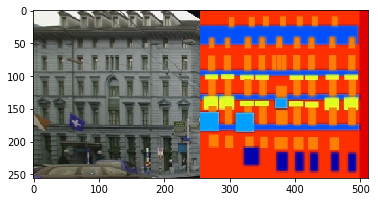

In [28]:
im_rgb, im_lab = trainer.val_dl()
plt.imshow(np.hstack([im_rgb, im_lab]))

In [41]:
def generate_image(model, input_img, target_img):
    if len(input_img.shape) == 3:
        input_img = tf.expand_dims(input_img, axis=0)
    predict = model(input_img, training=False)
    plt.imshow(np.hstack([input_img[0], predict[0], target_img]))
    

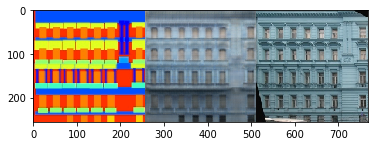

In [69]:
generate_image(trainer.generator, *trainer.val_dl()[::-1])